In [1]:
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
now = datetime.datetime.now()

In [3]:
data = pd.read_csv("spotify_top50_2021.csv")
print(data.shape)
print(data.isnull().sum())

(50, 18)
id                  0
artist_name         1
track_name          1
track_id            1
popularity          1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
time_signature      1
dtype: int64


In [4]:
data = data.dropna()
print(data.isnull().sum().sum())
print(data.dtypes)
print(data.head())
print(data.columns.values)

0
id                   object
artist_name          object
track_name           object
track_id             object
popularity          float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object
  id     artist_name                      track_name                track_id  \
0  1  Olivia Rodrigo                 drivers license  5wANPM4fQCJwkGd4rN57mH   
1  2       Lil Nas X  MONTERO (Call Me By Your Name)  1SC5rEoYDGUK4NfG82494W   
2  3   The Kid LAROI       STAY (with Justin Bieber)  5PjdY0CKGZdEuoNab3yDmX   
3  4  Olivia Rodrigo                        good 4 u  4ZtFanR9U6ndgddUvNcjcG   
4  5        Dua Lipa       Levitating (feat. DaBaby)  5nujrmhLynf4yMoMtj8AQF   


In [5]:
data = data.drop(["track_id","id"], axis=1)
print(data.shape[1])

16


In [6]:
ch = ["track_name","artist_name"]
for x in ch:
    La = LabelEncoder()
    data[x] = La.fit_transform(data[x])
print(data.head())

   artist_name  track_name  popularity  danceability  energy   key  loudness  \
0           23          43        92.0         0.561   0.431  10.0    -8.810   
1           18          23        90.0         0.593   0.503   8.0    -6.725   
2           30          31        92.0         0.591   0.764   1.0    -5.484   
3           23          44        95.0         0.563   0.664   9.0    -5.044   
4            6          22        89.0         0.702   0.825   6.0    -3.787   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0   1.0       0.0578       0.76800          0.000014    0.1060    0.137   
1   0.0       0.2200       0.29300          0.000000    0.4050    0.710   
2   1.0       0.0483       0.03830          0.000000    0.1030    0.478   
3   1.0       0.1540       0.33500          0.000000    0.0849    0.688   
4   0.0       0.0601       0.00883          0.000000    0.0674    0.915   

     tempo  duration_ms  time_signature  
0  143.875     242013.0   

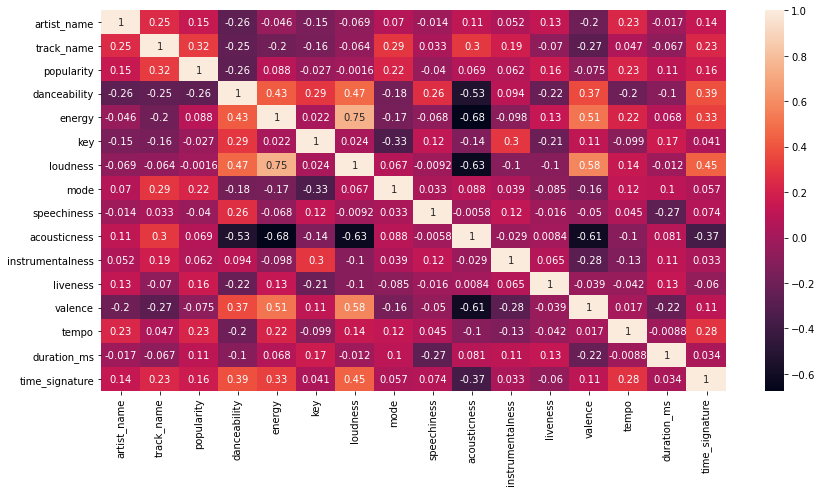

In [7]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [8]:
now1 = datetime.datetime.now()
print(now1 - now)


0:01:38.598578


In [9]:
x = data.drop("mode", axis=1)
y = data["mode"]
ss = StandardScaler()
x = ss.fit_transform(x)
print(x.shape)
print(y.shape)

(49, 15)
(49,)


In [11]:
DT = DecisionTreeClassifier()
DT.fit(x, y)

print(DT.score(x,y))
print(DT.feature_importances_)

1.0
[0.         0.         0.         0.14369501 0.         0.19387762
 0.         0.15221027 0.05854241 0.         0.22377742 0.06690562
 0.         0.16099164 0.        ]


In [12]:
inp = [0.2 , 0.50, 0.09, 0.3, 0.4, 0.1, 0.5, 0.4, 0.66, 0.7, 0.044, 0.4, 0.1, 0.5, 0.4]
print(len(inp))

print(DT.predict([inp]))

15
[1.]
